# Multidimensional SD Models

This document illustrates how vector- or matrix-valued SD Models can be defined.

We start with some boilerplate to get a BPTK project up and running:

In [ ]:
from BPTK_Py import Model
from BPTK_Py.bptk import bptk

testbptk = bptk()
model = Model(starttime = 0.0, stoptime= 15.0, dt= 1.0, name="TestModel")

This is already enough to define arrayed components. 

## How to define arrayed components

There are two options for arrayed components:
- Vectors (one dimensional arrays)
- Matrices (two dimensional arrays)

Moreover, both types of arrays - Vectors and Matrices - can be setup:
- using numerical indices
- using string-valued indices (named arrays)

Lets have a look at some examples:

In [2]:
## Defining a Vector (with numerical indices)
# Define an sd dsl element
vector1 = model.converter("vector1")

# Create a vector of length 2 with different values
vector1.setup_vector(2, [2.0, 3.0])

# Create a vector of length 2 with identical values
vector1.setup_vector(2, 3.0)

In [3]:
## Defining a named Vector (with string-valued indices)
# Define a sd dsl element
vector2 = model.converter("vector2")

# Create a named vector of length 2 using string-valued indices
vector2.setup_named_vector({"value1": 4.0, "value2": 5.0})

As can be seen, we need two parameters for setting up a Vector using numerical indices.
Moreover, there is one optional parameter.

<table>
    <tr>
        <th style="text-align: left;"> Parameter </th>
        <th style="text-align: left;"> Tye </th>
        <th style="text-align: left;"> Meaning </th>
    <tr>
    <tr>
        <td> size </td>
        <td> Integer </td>
        <td> Defines the length of the Vector </td>
    </tr>
    <tr>
        <td> values </td>
        <td> List of Float/Integer </td>
        <td> Defines the values of the Vector elements </td>
    </tr>
    <tr>
        <td> set_stack_equation </td>
        <td> Boolean </td>
        <td> (optional) If the element is a stock, the initial value is set (False) or the equation is set (True). Default is False.</td>
    </tr>    
</table>    

And we need one parameter (+ one optional parameter) for setting up a Vector using string indices:

<table>
    <tr>
        <th style="text-align: left;"> Parameter </th>
        <th style="text-align: left;"> Tye </th>
        <th style="text-align: left;"> Meaning </th>
    <tr>
    <tr>
        <td> Values </td>
        <td> Dictionary</td>
        <td> Defines the string-values indices and their values </td>
    </tr>
    <tr>
        <td> set_stack_equation </td>
        <td> Boolean </td>
        <td> (optional) If the element is a stock, the initial value is set (False) or the equation is set (True). Default is False.</td>
    </tr>     
</table>    

For matrices, we can proceed completely similar.

In [4]:
## Defining a Matrix (with numerical indices)
# Define a sd dsl element
matrix1 = model.converter("matrix1")

# Create a matrix of size 2x2 with different values
matrix1.setup_matrix([2,2], [[2.0, 3.0], 
                             [4.0, 5.0]])

In [5]:
## Defining a named Matrix (with string-valued indices)
# Define a sd dsl element
matrix2 = model.converter("matrix2")

# Create a named vector of lenght 2 using string-valued indices
matrix2.setup_named_matrix({"value1": {"value11": 2.0, "value12": 3.0}, 
                            "value2": {"value21": 4.0, "value22": 5.0}})

As can be seen, we need two parameters (+ one optional parameter) for setting up a Matrix using numerical indices:

<table>
    <tr>
        <th style="text-align: left;"> Parameter </th>
        <th style="text-align: left;"> Tye </th>
        <th style="text-align: left;"> Meaning </th>
    <tr>
    <tr>
        <td> size </td>
        <td> List (tuple) of Integer</td>
        <td> Defines the size of the Matrix </td>
    </tr>
    <tr>
        <td> values </td>
        <td> List of Lists of Float/Integer </td>
        <td> Defines the values of the Vector elements </td>
    </tr>
    <tr>
        <td> set_stack_equation </td>
        <td> Boolean </td>
        <td> (optional) If the element is a stock, the initial value is set (False) or the equation is set (True). Default is False.</td>
    </tr>    
</table>    

And we need one parameter (+ one optional parameter) for setting up a Matrix using string-valued indices:

<table>
    <tr>
        <th style="text-align: left;"> Parameter </th>
        <th style="text-align: left;"> Tye </th>
        <th style="text-align: left;"> Meaning </th>
    <tr>
    <tr>
        <td> Values </td>
        <td> Dictionary</td>
        <td> Defines the string-values indices and their values </td>
    </tr>
    <tr>
        <td> set_stack_equation </td>
        <td> Boolean </td>
        <td> (optional) If the element is a stock, the initial value is set (False) or the equation is set (True). Default is False.</td>
    </tr>     
</table>    

## Math-Operations for arrayed Components

The standard Operations (+, -, *, %) can be used for arrayed Components.
Moreover some array-specific Operations are provided.

### Standard Operations

It is possible to use the standard Operations (+, -, *, %) for:

<table>
    <tr>
        <th style="text-align: left;"> Operand 1 </th>
        <th style="text-align: left;"> Operand 2 </th>
    <tr>
    <tr>
        <td> Arrayed Element </td>
        <td> Arrayed Element</td>
    </tr>
    <tr>
        <td> Arrayed Element </td>
        <td> Float/Integer</td>
    </tr>
    <tr>
        <td> Float/Integer</td>
        <td> Arrayed Element </td>
    </tr>    
</table> 

⚠️ If both operands are arrayed elements, they must have the same numerical/string-valued indices.

That means it is **not** possible to have operand 1 = vector with numerical indices and operand 2 = vector with string-valued indicies, even if they have the same size.

It is also **not** possible to have operand 1 = vector and operand 2 = matrix or vice versa. 

Other standard Operations (\*\*, //, %, ...) are **not** supported yet.

Standard Operations are always performed element-wise.
Lets have a look at some examples:

#### Addition ($+$)

In [6]:
#Add not-named vectors
vectorAdd1 = model.converter("vectorAdd1")
vectorAdd1.setup_vector(2, [1.1, 2.2])

vectorAdd2 = model.converter("vectorAdd2")
vectorAdd2.setup_vector(2, [3.1, 4.2])

addResult = model.converter("addResult")
addResult.equation = vectorAdd1 + vectorAdd2



\begin{equation*}
\begin{pmatrix} 
1.1 \\
2.2 
\end{pmatrix}
+
\begin{pmatrix} 
3.1 \\
4.2 
\end{pmatrix}
=
\begin{pmatrix} 
4.2 \\
6.4 
\end{pmatrix}
\end{equation*}

In [7]:
print("[ " + str(addResult[0](0)) + " , " + str(addResult[1](0)) + " ]")


[ 4.2 , 6.4 ]


In [8]:
#Add not-named vector and numerical element
addResult.equation = vectorAdd2 + 1.0



\begin{equation*}
\begin{pmatrix} 
3.1 \\
4.2 
\end{pmatrix}
+1.0
=
\begin{pmatrix} 
4.1 \\
5.2 
\end{pmatrix}
\end{equation*}

In [9]:
print("[ " + str(addResult[0](0)) + " , " + str(addResult[1](0)) + " ]")


[ 4.1 , 5.2 ]


#### Subtraction ($-$)

In [10]:
#Subtract not-named matrices
matrixMinus1 = model.converter("matrixMinus1")
matrixMinus1.setup_matrix([2,2], [[1.1, 2.2],
                                  [3.3, 4.4]])

matrixMinus2 = model.converter("matrixMinus2")
matrixMinus2.setup_matrix([2,2], [[5.5, 7.7],
                                  [3.3, 14.4]])

minusResult = model.converter("minusResult")
minusResult.equation = matrixMinus1 - matrixMinus2


\begin{equation*}
\begin{pmatrix} 
1.1 & 2.2 \\
3.3 & 4.4 
\end{pmatrix}
-
\begin{pmatrix} 
5.5 & 7.7 \\
3.3 & 14.4 
\end{pmatrix}
=
\begin{pmatrix} 
-4.4 & -5.5\\
0.0 & -10.0
\end{pmatrix}
\end{equation*}

In [11]:
print("[ " + "[" + str(minusResult[0][0](1)) + " , " + str(minusResult[0][1](1)) + "]")
print("  " + "[" + str(minusResult[1][0](1)) + " , " + str(minusResult[1][1](1)) + "]" + " ]")

[ [-4.4 , -5.5]
  [0.0 , -10.0] ]


In [12]:
#Subtract not-named matrix and numerical element
minusResult.equation = matrixMinus2 - 1.0

\begin{equation*}
\begin{pmatrix} 
5.5 & 7.7 \\
3.3 & 14.4 
\end{pmatrix}
-1.0
=
\begin{pmatrix} 
4.5 & 6.7\\
2.3 & 13.4 
\end{pmatrix}
\end{equation*}

In [13]:
print("[ " + "[" + str(minusResult[0][0](1)) + " , " + str(minusResult[0][1](1)) + "]")
print("  " + "[" + str(minusResult[1][0](1)) + " , " + str(minusResult[1][1](1)) + "]" + " ]")

[ [4.5 , 6.7]
  [2.3 , 13.4] ]


#### Multiplication ($*$)

In [14]:
#Multiply named vectors
vectorTimes1 = model.converter("vectorTimes1")
vectorTimes1.setup_named_vector({"value1": 4.0, "value2": 5.0})

vectorTimes2 = model.converter("vectorTimes2")
vectorTimes2.setup_named_vector({"value1": 6.0, "value2": 7.0})

timesResult = model.converter("timesResult")
timesResult.equation = vectorTimes1 * vectorTimes2



\begin{equation*}
\begin{pmatrix} 
4.0\\
5.0 
\end{pmatrix}
\odot
\begin{pmatrix} 
6.0\\
7.0 
\end{pmatrix}
=
\begin{pmatrix} 
24.0\\
35.0
\end{pmatrix}
\end{equation*}

In [15]:
print("[ " + str(timesResult["value1"](0)) + " , " + str(timesResult["value2"](0)) + " ]")


[ 24.0 , 35.0 ]


In [16]:
#Multiplay named vector and numerical element
timesResult.equation = vectorTimes2 * 3.0

\begin{equation*}
\begin{pmatrix} 
6.0\\
7.0 
\end{pmatrix}
\cdot
3.0
=
\begin{pmatrix} 
18.0\\
21.0
\end{pmatrix}
\end{equation*}

In [17]:
print("[ " + str(timesResult["value1"](0)) + " , " + str(timesResult["value2"](0)) + " ]")


[ 18.0 , 21.0 ]


The case "- arrayed element" is a special case since it is interpreted as "(-1) $\cdot$ element":

In [18]:
##Works after merge

#Multiplay named vector and numerical element
#timesResult = model.converter("timesResult")
#timesResult.equation = -vectorTimes2



\begin{equation*}
- \begin{pmatrix} 
6.0\\
7.0 
\end{pmatrix}
=
\begin{pmatrix} 
-6.0\\
-7.0
\end{pmatrix}
\end{equation*}

In [19]:
#print("[ " + str(timesResult["value1"](0)) + " , " + str(timesResult["value2"](0)) + " ]")


#### Division ($/$)

In [20]:
#Divide not-named matrices
matrixDivide1 = model.converter("matrixDivide1")
matrixDivide1.setup_matrix([2,2], [[2.0, 4.0],
                                   [8.0, 16.0]])

matrixDivide2 = model.converter("matrixDivide2")
matrixDivide2.setup_matrix([2,2], [[2.0, 1.0],
                                   [0.5, 0.25]])

divideResult = model.converter("divideResult")
divideResult.equation = matrixDivide1 / matrixDivide2


\begin{equation*}
\begin{pmatrix} 
2.0 & 4.0\\
8.0 & 16.0 
\end{pmatrix}
\oslash
\begin{pmatrix} 
2.0 & 1.0\\
0.5 & 0.25 
\end{pmatrix}
=
\begin{pmatrix} 
1.0 & 4.0\\
16.0 & 64.0
\end{pmatrix}
\end{equation*}

In [21]:
print("[ " + "[" + str(divideResult[0][0](1)) + " , " + str(divideResult[0][1](1)) + "]")
print("  " + "[" + str(divideResult[1][0](1)) + " , " + str(divideResult[1][1](1)) + "]" + " ]")

[ [1.0 , 4.0]
  [16.0 , 64.0] ]


In [22]:
#Divide not-named matrix and numerical element
divideResult.equation = matrixDivide2 / 5.0

\begin{equation*}
\begin{pmatrix} 
2.0 & 1.0\\
0.5 & 0.25 
\end{pmatrix}
/
\text{ } 5.0
=
\begin{pmatrix} 
0.4 & 0.2\\
0.1 & 0.05
\end{pmatrix}
\end{equation*}

In [23]:
print("[ " + "[" + str(divideResult[0][0](1)) + " , " + str(divideResult[0][1](1)) + "]")
print("  " + "[" + str(divideResult[1][0](1)) + " , " + str(divideResult[1][1](1)) + "]" + " ]")

[ [0.4 , 0.2]
  [0.1 , 0.05] ]


### Array-specific Operations

#### Array Sum

Calculates the element-wise sum of an array.

In [24]:
#Calculate the element-wise sum of a named-vector
vectorSum = model.converter("vectorSum")
vectorSum.setup_named_vector({"value1": 1.0, "value2": 2.0, "value3": 3.0})

sumResult = model.converter("sumResult")
sumResult.equation = vectorSum.arr_sum()



\begin{equation*}
\text{sum} 
\begin{pmatrix} 
1.0 \\
2.0\\
3.0
\end{pmatrix}
=
1.0 + 2.0 + 3.0 = 6.0
\end{equation*}

In [25]:
print(sumResult(1))

6.0


#### Array Product

Calculates the element-wise product of an array.

In [26]:
#Calculate the element-wise product of a not-named-matrix
matrixProd = model.converter("matrixProd")
matrixProd.setup_matrix([2,3],[[2.0, 3.0, 4.0], 
                               [5.0, 6.0, 7.0]])

prodResult = model.converter("prodResult")
prodResult.equation = matrixProd.arr_prod()



\begin{equation*}
\text{prod} 
\begin{pmatrix} 
2.0 & 3.0 & 4.0 \\
5.0 & 6.0 & 7.0
\end{pmatrix}
=
2.0 \cdot 3.0 \cdot 4.0 \cdot 5.0 \cdot 6.0 \cdot 7.0 = 5040.0
\end{equation*}

In [27]:
print(prodResult(1))

5040.0


#### Array Rank

Calculates the $n$-th highest element of an array. $n$ is given by a parameter. 

For $n=-1$ the lowest element of the array will be returned.

In [28]:
#Calculate the highest elements of a not-named vector
vectorRank = model.converter("vectorRank")
vectorRank.setup_vector(5, [-2.0, -0.1, 3.1, 5.2, 11.1])

rankResult = model.converter("rankResult")
rankResult.equation = vectorRank.arr_rank(1)

\begin{equation*}
\text{rank} 
\left(
\begin{pmatrix} 
-2.0\\
-0.1\\
3.1\\
5.2\\
11.1
\end{pmatrix}
,
1
\right)
=
11.1
\end{equation*}

In [29]:
print(rankResult(1))


11.1


In [30]:
rankResult.equation = vectorRank.arr_rank(4)


\begin{equation*}
\text{rank} 
\left(
\begin{pmatrix} 
-2.0\\
-0.1\\
3.1\\
5.2\\
11.1
\end{pmatrix}
,
4
\right)
=
-0.1
\end{equation*}

In [31]:
print(rankResult(1))


-0.1


In [32]:
rankResult.equation = vectorRank.arr_rank(-1)


\begin{equation*}
\text{rank} 
\left(
\begin{pmatrix} 
-2.0\\
-0.1\\
3.1\\
5.2\\
11.1
\end{pmatrix}
,
-1
\right)
=
-2.0
\end{equation*}

In [33]:
print(rankResult(1))

-2.0


#### Array Mean

Calculates the element-wise mean of an array.

In [34]:
#Calculate the element-wise mean of a named matrix
matrixMean = model.converter("matrixMean")
matrixMean.setup_named_matrix({"value1": {"value11": 2.0, "value12": 4.0},
                               "value2": {"value21": 6.0, "value22": 8.0},
                               "value3": {"value31": 10.0, "value32": 12.0}})

meanResult = model.converter("meanResult")
meanResult.equation = matrixMean.arr_mean()

\begin{equation*}
\text{mean} 
\begin{pmatrix} 
2.0 & 4.0\\
6.0 & 8.0\\
10.0 & 12.0
\end{pmatrix}
=
\frac{2.0 + 4.0 + 6.0 + 8.0 + 10.0 +12.0}{6} = 7.0
\end{equation*}

In [35]:
print(meanResult(1))

7.0


#### Array Median

Calculates the element-wise median of an array.

In [36]:
#Calculate the median of a not-named vector
vectorMedian1 = model.converter("vectorMedian1")
vectorMedian1.setup_vector(5, [-2.0, -0.1, 3.1, 5.2, 11.1])
vectorMedian2 = model.converter("vectorMedian2")
vectorMedian2.setup_vector(4, [-2.0, -0.1, 3.1, 5.2])

medianResult = model.converter("medianResult")
medianResult.equation = vectorMedian1.arr_median()



\begin{equation*}
\text{median} 
\begin{pmatrix} 
-2.0\\
-0.1\\
3.1\\
5.2\\
11.1
\end{pmatrix}
=
3.1
\end{equation*}

In [37]:
print(medianResult(1)) 


3.1


In [38]:
medianResult.equation = vectorMedian2.arr_median()


\begin{equation*}
\text{median} 
\begin{pmatrix} 
-2.0\\
-0.1\\
3.1\\
5.2\\
\end{pmatrix}
=
\frac{-0.1+3.1}{2}=1.5
\end{equation*}

In [39]:
print(medianResult(1)) #Median of vectorMedian2 is (-0.1 + 3.1)/2 = 1.5

1.5


#### Array Standdarddeviation

Calculates the element-wise standard deviation of an array.

In [40]:
#Calculate the standard deviation of a not-named matrix
matrixStddev = model.converter("matrixStddev")
matrixStddev.setup_matrix([2,2], [[1.0, 3.0], 
                                  [3.0, 1.0]])

stddevResult = model.converter("stddevResult")
stddevResult.equation = matrixStddev.arr_stddev()



\begin{equation*}
\sigma
\begin{pmatrix} 
1.0 & 3.0\\
3.0 & 1.0
\end{pmatrix}
= \sqrt{
\frac{1}{4} 
\cdot
\left(
(1-2)^2
+
(3-2)^2
+
(3-2)^2
+
(1-2)^2
\right)
}
=
1
\end{equation*}

In [41]:
print(stddevResult(1))

1.0


#### Array Size

Calculates the size of an array.

For a vector, the length will be returned.
For a matrix, the size of the highest level will be returned (for example 2 for a $2 \times 3$ matrix).

In [42]:
#Calculate the size of a not-named vector
vectorSize = model.converter("vectorSize")
vectorSize.setup_vector(6, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

#Calculate the size of a not-named matrix
matrixSize1 = model.converter("matrixSize2")
matrixSize1.setup_matrix([2,3], [[1.0, 1.0, 1.0], 
                                 [1.0, 1.0, 1.0]])
matrixSize2 = model.converter("matrixSize3")
matrixSize2.setup_matrix([4,3], [[1.0, 1.0, 1.0], 
                                 [1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0], 
                                 [1.0, 1.0, 1.0]])

sizeResult = model.converter("sizeResult")
sizeResult.equation = vectorSize.arr_size()

\begin{equation*}
\text{len} 
\begin{pmatrix} 
1.0\\
1.0\\
1.0\\
1.0\\
1.0\\
1.0\\
\end{pmatrix}
=
6
\end{equation*}

In [43]:
print(sizeResult(1))

6


In [44]:
sizeResult.equation = matrixSize1.arr_size()

\begin{equation*}
\text{len} 
\begin{pmatrix} 
1.0 & 1.0 & 1.0\\
1.0 & 1.0 & 1.0
\end{pmatrix}
=
2
\end{equation*}

In [45]:
print(sizeResult(1))



2


In [46]:
sizeResult.equation = matrixSize2.arr_size()


\begin{equation*}
\text{len} 
\begin{pmatrix} 
1.0 & 1.0 & 1.0\\
1.0 & 1.0 & 1.0\\
1.0 & 1.0 & 1.0\\
1.0 & 1.0 & 1.0
\end{pmatrix}
=
4
\end{equation*}

In [47]:
print(sizeResult(1))



4


#### Array Dot

The Dot function provides the classical vector/matrix-multiplication logic. That means, the following can be calculated:

| Factor 1 | Factor 2 | Result |
|-|-|-|
| Vector of size $m$ | Constant | Vector of size $m$ |
| Constant | Vector of size $m$ | Vector of size $m$ |
| Matrix of size $m \times n$ | Constant  | Matrix of size $m \times n$ |
| Constant | Matrix of size $m \times n$  | Matrix of size $m \times n$ |
| Vector of size $m$ | Vector of size $m$  | Value (Scalar Product) |
| Vector of size $m$ | Matrix of size $m \times n$ | Vector of size $n$ |
| Matrix of size $m \times n$ | Vector of size $n$ | Vector of size $m$ |
| Matrix of size $m \times n$ | Matrix of size $n \times p$ | Matrix of size $m \times p$ |

❗ Using the Dot function for an array and a constant yields the same result as using the $*$-Operator for the array and the value of the constant.

If the dimensions of the arrays to which the dot function is applied do not allow for a valid array multiplication, an exception is thrown.

⚠️ **The Dot function is currently supported for not-named arrays only!**

Lets have a look at some examples:

In [48]:
#Calculate vector * constant & constant * vector
constant  = model.converter("constant")
constant.equation = 2.0

vectorDot1 = model.converter("vectorDot1")
vectorDot1.setup_vector(3,[1.0, 2.0, 3.0])
vectorDot2 = model.converter("vectorDot2")
vectorDot2.setup_vector(3,[4.0, 5.0, 6.0])

dotResult1 = model.converter("dotResult1")

dotResult1.equation = vectorDot1.dot(constant)


\begin{equation*}
2.0 \cdot \begin{pmatrix} 1.0 \\ 2.0 \\ 3.0 \end{pmatrix}
=
\begin{pmatrix} 2.0 \\ 4.0 \\ 6.0 \end{pmatrix}\end{equation*}

In [49]:
print("[" + str(dotResult1[0](1)) + " , " + str(dotResult1[1](1)) + " , " + str(dotResult1[2](1)) + "]")

[2.0 , 4.0 , 6.0]


In [50]:
dotResult1.equation = constant.dot(vectorDot2)

\begin{equation*}
\begin{pmatrix} 4.0 \\ 5.0 \\ 6.0 \end{pmatrix} \cdot 2.0
=
\begin{pmatrix} 8.0 \\ 10.0 \\ 12.0 \end{pmatrix}\end{equation*}

In [51]:
print("[" + str(dotResult1[0](1)) + " , " + str(dotResult1[1](1)) + " , " + str(dotResult1[2](1)) + "]")

[8.0 , 10.0 , 12.0]


In [52]:
#Calculate matrix * constant & constant * matrix
constant  = model.converter("constant")
constant.equation = 2.0

matrixDot1 = model.converter("matrixDot1")
matrixDot1.setup_matrix([3,2],[[1.0, 2.0],
                               [3.0, 4.0],
                               [5.0, 6.0]])
matrixDot2 = model.converter("matrixDot2")
matrixDot2.setup_matrix([2,3],[[-1.0, -2.0, -3.0],
                               [-4.0, -5.0, -6.0]])

dotResult2 = model.converter("dotResult2")

dotResult2.equation = matrixDot1.dot(constant)

\begin{equation*}
\begin{pmatrix}
1.0 & 2.0 \\
3.0 & 4.0 \\
5.0 & 6.0
\end{pmatrix} \cdot 2.0
=
\begin{pmatrix}
2.0 & 4.0 \\
6.0 & 8.0 \\
10.0 & 12.0
\end{pmatrix}\end{equation*}

In [53]:
print("[ " + "[" + str(dotResult2[0][0](1)) + " , " + str(dotResult2[0][1](1)) + "]")
print("  " + "[" + str(dotResult2[1][0](1)) + " , " + str(dotResult2[1][1](1)) + "]")
print("  " + "[" + str(dotResult2[2][0](1)) + " , " + str(dotResult2[2][1](1)) + "]" + " ]")

[ [2.0 , 4.0]
  [6.0 , 8.0]
  [10.0 , 12.0] ]


In [54]:
dotResult2.equation = constant.dot(matrixDot2)


\begin{equation*}
2.0 \cdot
\begin{pmatrix}
-1.0 & -2.0 & -3.0 \\
-4.0 & -5.0 & -6.0 \\
\end{pmatrix}
=
\begin{pmatrix}
-2.0 & -4.0 & -6.0 \\
-8.0 & -10.0 & -12.0 \\
\end{pmatrix}\end{equation*}

In [55]:
print("[ " + "["    + str(dotResult2[0][0](1)) + " , " + str(dotResult2[0][1](1)) + " , " 
                    + str(dotResult2[0][2](1)) + "]")
print("  " + "["    + str(dotResult2[1][0](1)) + " , " + str(dotResult2[1][1](1)) + " , " 
                    + str(dotResult2[1][2](1)) + "]" + " ]")

[ [-2.0 , -4.0 , -6.0]
  [-8.0 , -10.0 , -12.0] ]


In [56]:
#Calculate vector * vector
dotResult3 = model.converter("dotResult3")

dotResult3.equation = vectorDot1.dot(vectorDot2)

\begin{equation*}
\left\langle 
\begin{pmatrix} 1.0 \\ 2.0 \\ 3.0 \end{pmatrix}, 
\begin{pmatrix} 4.0 \\ 5.0 \\ 6.0 \end{pmatrix}
\right\rangle
=
1.0 \cdot 4.0 + 2.0 \cdot 5.0 + 3.0 \cdot 6.0
=
32.0
\end{equation*}

In [57]:
print(dotResult3(1)) #1*4 + 2*5 + 3*6 = 32 

32.0


In [58]:
#Calculate vector * matrix & matrix * vector
dotResult4 = model.converter("dotResult4")

dotResult4.equation = vectorDot1.dot(matrixDot1)

\begin{equation*}
\begin{pmatrix}
1.0 & 2.0 & 3.0 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
1.0 & 2.0 \\
3.0 & 4.0 \\
5.0 & 6.0 \\
\end{pmatrix}
=
\begin{pmatrix}
1.0 \cdot 1.0 + 2.0 \cdot 3.0 + 3.0 \cdot 5.0 \\
1.0 \cdot 2.0 + 2.0 \cdot 4.0 + 3.0 \cdot 6.0 \\
\end{pmatrix}
= 
\begin{pmatrix}
22.0 & 28.0
\end{pmatrix}
\end{equation*}

In [59]:
print("[" + str(dotResult4[0](1)) + " , " + str(dotResult4[1](1))  + "]")



[22.0 , 28.0]


In [60]:
dotResult4.equation = matrixDot2.dot(vectorDot2)


\begin{equation*}
\begin{pmatrix}
-1.0 & -2.0 & -3.0 \\
-4.0 & -5.0 & -6.0 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
4.0 \\
5.0 \\
6.0 \\
\end{pmatrix}
=
\begin{pmatrix}
-1.0 \cdot 4.0 + (-2.0) \cdot 5.0 + (-3.0) \cdot 6.0 \\
-4.0 \cdot 4.0 + (-5.0) \cdot 5.0 + (-6.0) \cdot 6.0 \\
\end{pmatrix}
=
\begin{pmatrix}
-32.0 \\
-77.0
\end{pmatrix}
\end{equation*}

In [61]:
print("[" + str(dotResult4[0](1)) + " , " + str(dotResult4[1](1)) + "]")

[-32.0 , -77.0]


In [62]:
#Calculate matrix * matrix
matrixDot3 = model.converter("matrixDot3")
matrixDot3.setup_matrix([2,2],[[1.0, 2.0],
                               [3.0, 4.0]])
matrixDot4 = model.converter("matrixDot4")
matrixDot4.setup_matrix([2,2],[[-1.0, -2.0],
                               [-4.0, -5.0]])

dotResult5 = model.converter("dotResult5")
dotResult5.equation = matrixDot3.dot(matrixDot4)

\begin{equation*}
\begin{aligned}
\begin{pmatrix}
1.0 & 2.0 \\
3.0 & 4.0 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
-1.0 & -2.0 \\
-4.0 & -5.0 \\
\end{pmatrix}
&=
\begin{pmatrix}
1.0 \cdot (-1.0) + 2.0 \cdot (-4.0) & 1.0 \cdot (-2.0) + 2.0 \cdot (-5.0) \\
3.0 \cdot (-1.0) + 4.0 \cdot (-4.0) & 3.0 \cdot (-2.0) + 4.0 \cdot (-5.0) \\
5.0 \cdot (-1.0) + 6.0 \cdot (-4.0) & 5.0 \cdot (-2.0) + 6.0 \cdot (-5.0) \\
\end{pmatrix}\\
&=
\begin{pmatrix}
-9 & -12 \\
-19 & -26\\
\end{pmatrix}
\end{aligned}
\end{equation*}

In [63]:
print("[ " + "["    + str(dotResult5[0][0](1)) + " , " + str(dotResult5[0][1](1)) + "]")
print("  " + "["    + str(dotResult5[1][0](1)) + " , " + str(dotResult5[1][1](1)) + "]" + " ]")

[ [-9.0 , -12.0]
  [-19.0 , -26.0] ]


## Plotting arrayed Components

Similar to one-dimensional SD DSL elements, we can also plot these elements.
Lets have a look:

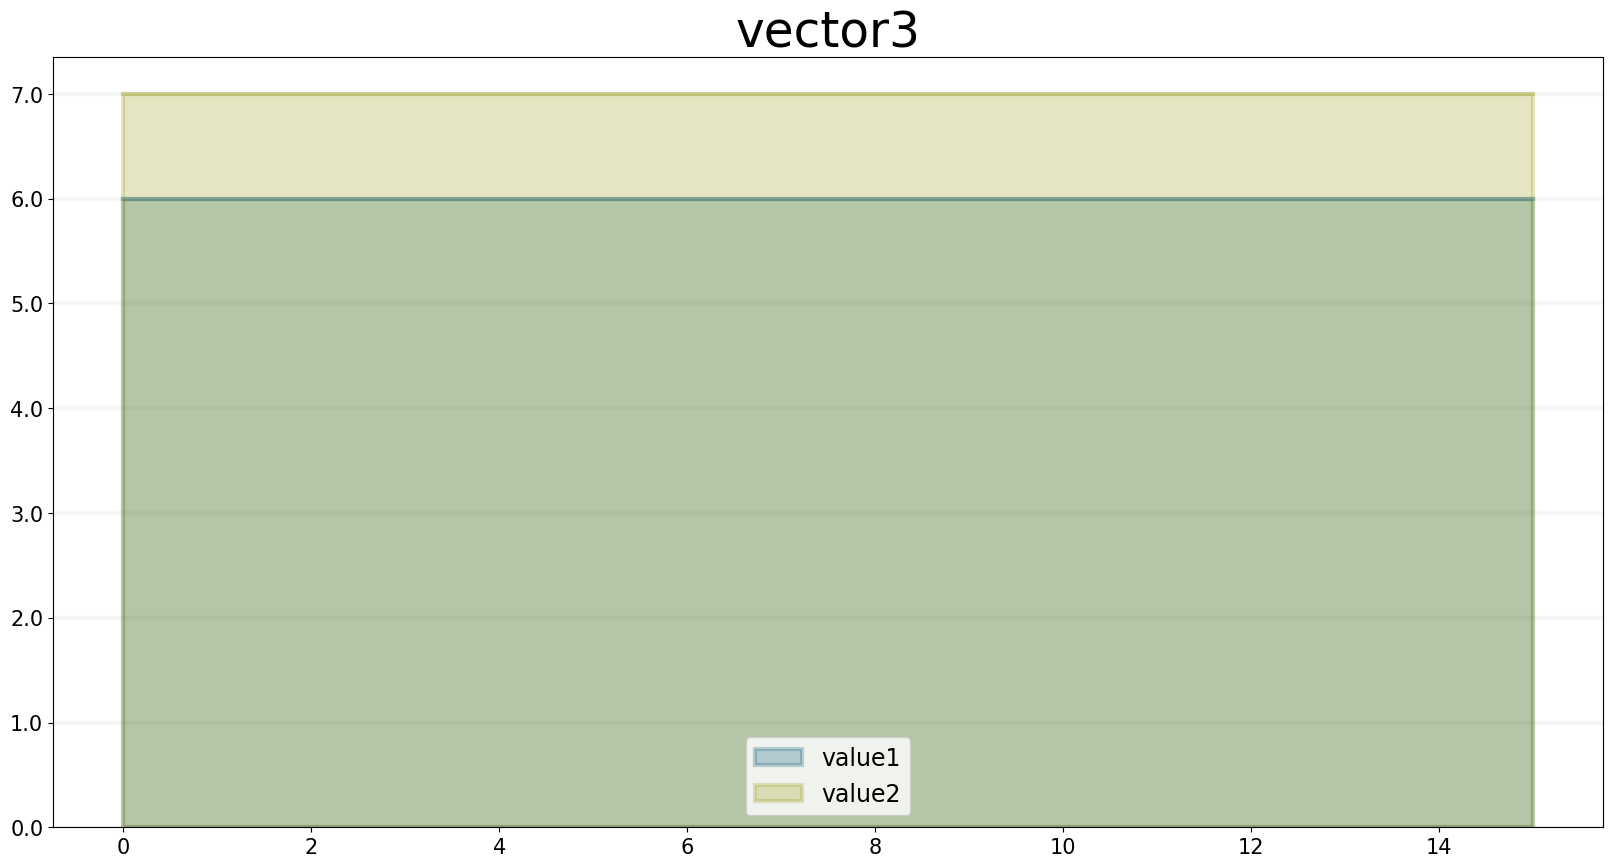

In [64]:
vector3 = model.converter("vector3")
vector3.setup_named_vector({"value1": 6.0, "value2": 7.0})
vector3.plot()

As can be seen, both elements of the Vector are plotted. 

If you want to plot the values of the Matrix, you need to specify the first index.

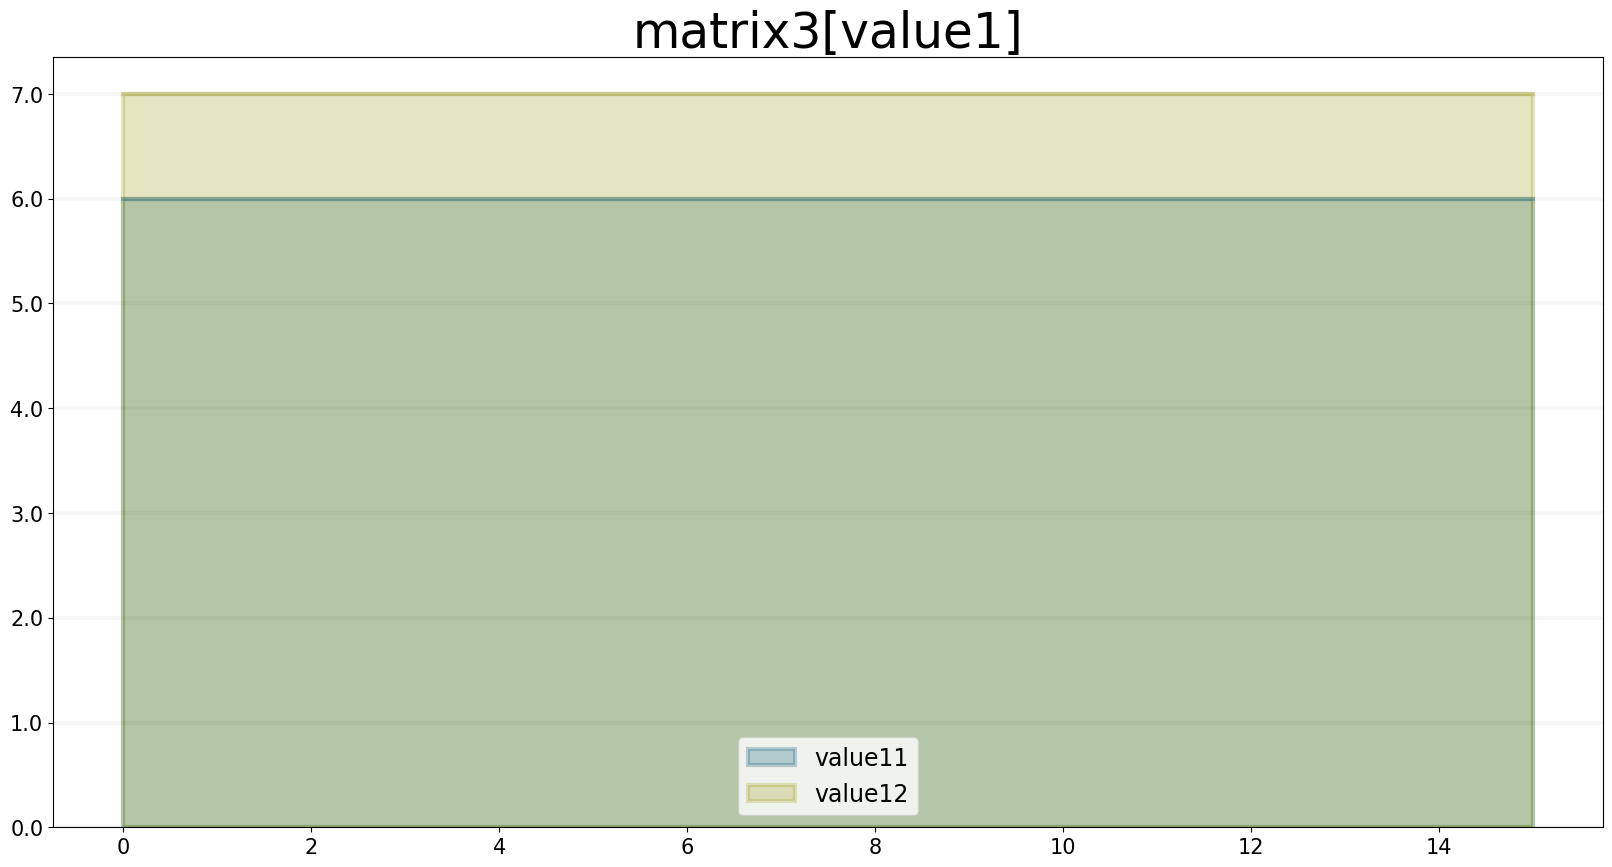

In [65]:
matrix3 = model.converter("matrix3")
matrix3.setup_named_matrix({"value1": {"value11": 6.0, "value12": 7.0}, 
                            "value2": {"value21": 8.0, "value22": 9.0}})
matrix3["value1"].plot()

## A simple Example

Lets have a look on a concrete example, how a multidimensional SD Model can look like.

Consider an investment depot with two accounts:
- bank account
- depot account

Both accounts will have different deposit rates and different interest rates each year.
We want to investigate the value development of the bank account, the depot account and the whole investment depot.

Lets set up the model:

In [66]:
account = model.stock("account")
account.setup_named_vector({"bank" : 0.0, "depot": 0.0})

#define the initial values of the accounts
accountInitialValues = model.constant("accountInitialValues")
accountInitialValues.setup_named_vector({"bank" : 1000.0, "depot": 500.0})

account["bank"].initial_value = accountInitialValues["bank"]
account["depot"].initial_value = accountInitialValues["depot"]
##Does not work yet:
#account.initial_value = accountInitialValues

#define the interest rates
interestRate = model.constant("interestRate")
interestRate.setup_named_vector({"bank" : 0.02, "depot": 0.1})

#define the deposit rates
depositRate = model.constant("depositRate")
depositRate.setup_named_vector({"bank" : 200.0, "depot": 100.0})

#define the flows
deposit = model.flow("deposit")
deposit.equation = depositRate * 1

interest = model.flow("interest")
interest.equation = account * interestRate

#set the equation for the stock value
account.equation = deposit + interest

#finally define a converter for the total value of the account
totalValue = model.converter("totalValue")
totalValue.equation = account.arr_sum()

As always we define a scenario manager and scenarios:

In [67]:
testbptk.register_model(model)
scenario_manager = {
    "sm": {
        "model": model,
        "base_constants": {
            "interestRate[bank]": 0.02,
            "interestRate[depot]": 0.1,
            "depositRate[bank]": 200,
            "depositRate[depot]": 100,
            "accountInitialValues[bank]": 1000.0,
            "accountInitialValues[depot]": 500.0
        },
    }
}
testbptk.register_scenario_manager(scenario_manager)
testbptk.register_scenarios(
    scenario_manager="sm",
    scenarios=
    {
        "base":{},
        "scenarioHighDepotInterestRate":{
            "constants": {
                "interestRate[depot]": 0.2
            }
        },
        "scenarioHighDepotDepositRate":{
            "constants": {
                "depositRate[depot]": 250.0
            }
        },
        "scenarioHighDepotInitialValue":{
            "constants": {
                "accountInitialValues[depot]": 750.0
            }
        }
    }
)

And plot the results:

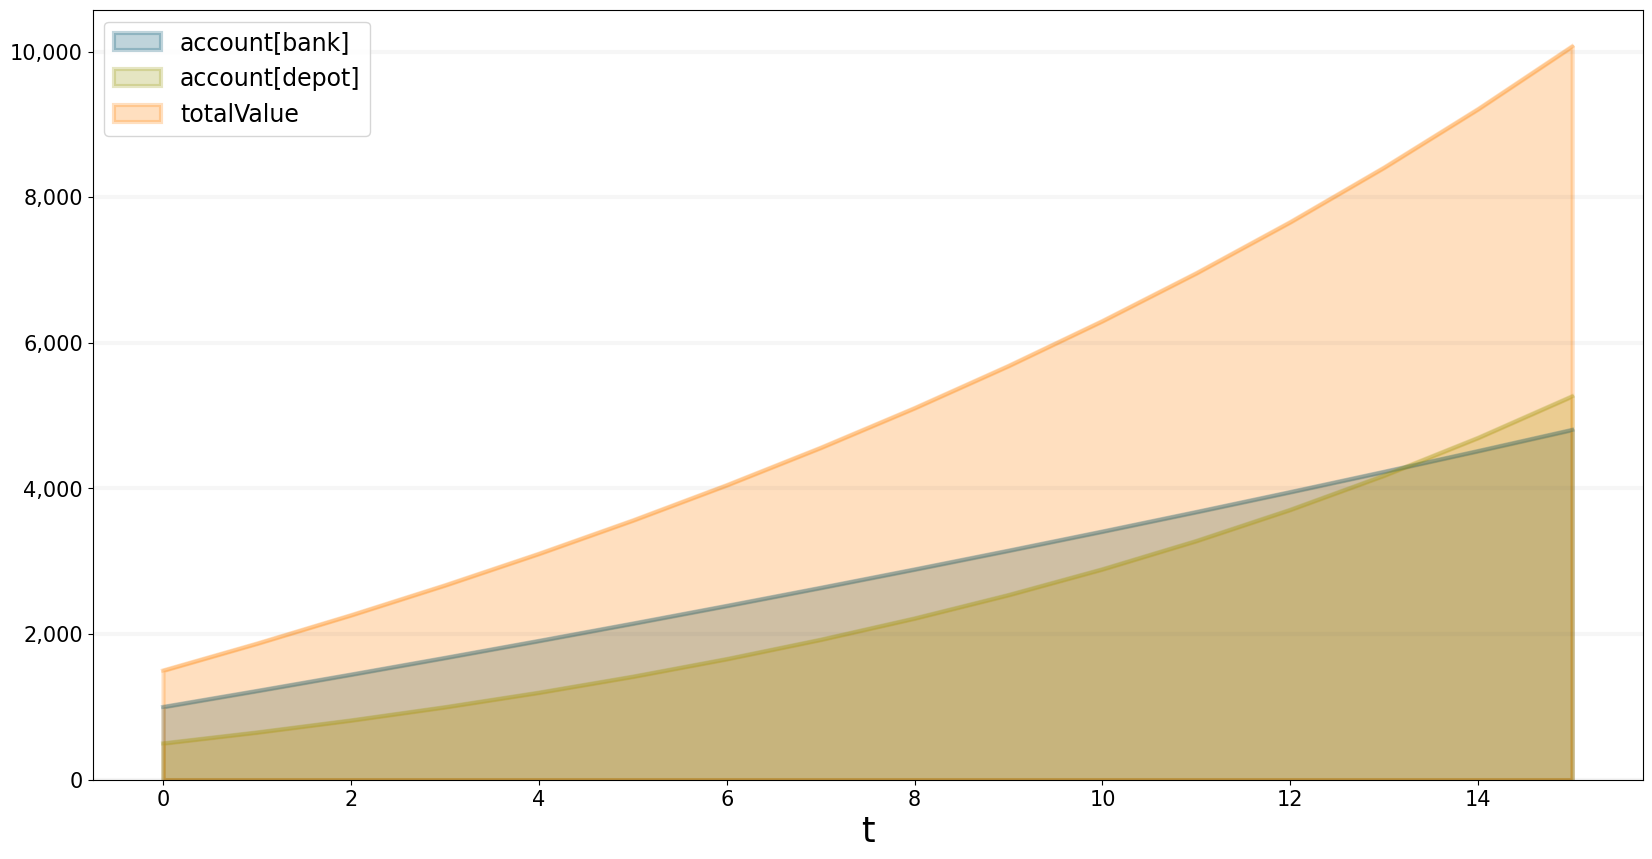

In [68]:
testbptk.plot_scenarios(
    scenarios=["base"],
    scenario_managers="sm",
    equations=["account[bank]", "account[depot]", "totalValue"],
    series_names={})

As always we can compare different scenarios with each other by plotting them simultaneously:

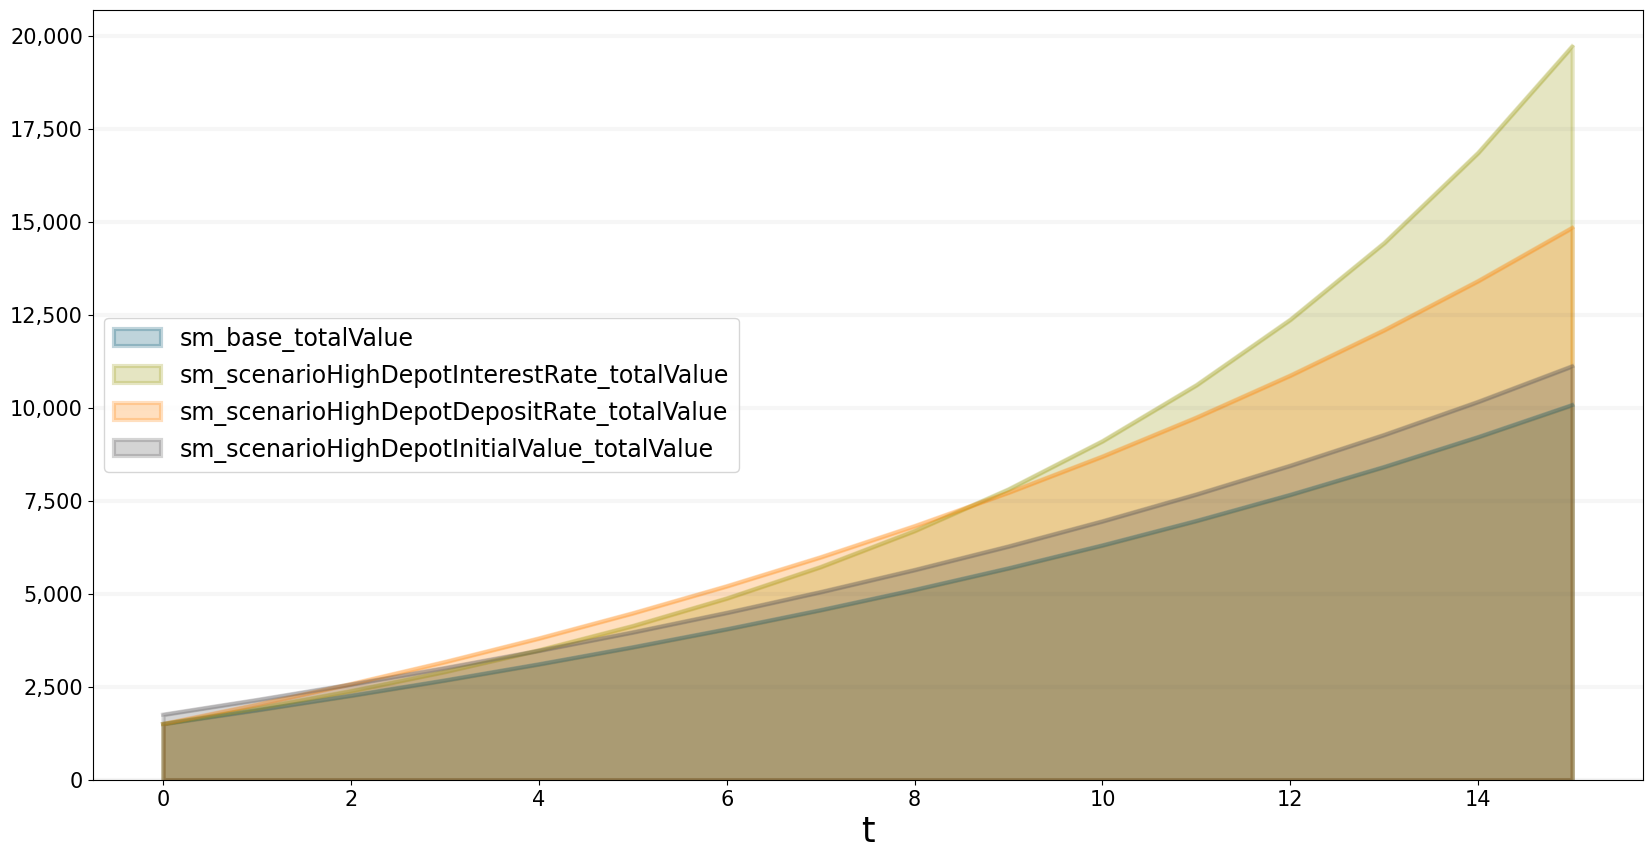

In [69]:
testbptk.plot_scenarios(
    scenarios=["base", 
               "scenarioHighDepotInterestRate", 
               "scenarioHighDepotDepositRate", 
               "scenarioHighDepotInitialValue"],
    scenario_managers="sm",
    equations=["totalValue"],
    series_names={})